In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

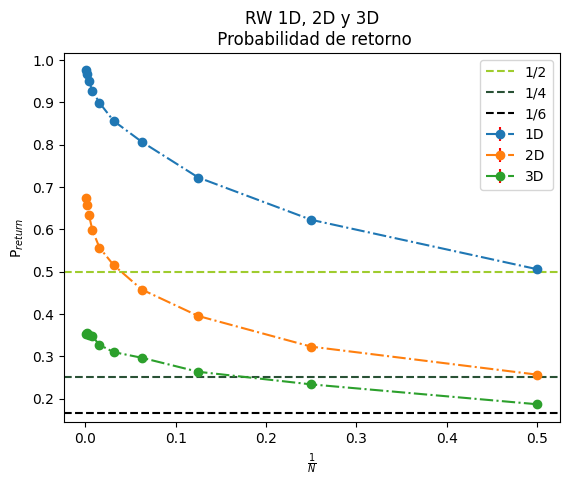

In [35]:
df1 = pd.read_csv("Datos/caminante_1d.csv")
df2 = pd.read_csv("Datos/caminante_2d.csv")
df3 = pd.read_csv("Datos/caminante_3d.csv")

plt.errorbar(1/df1['n_max'],df1['prob'],yerr=df1["error"],marker="o",ls="-.",ecolor="red",label="1D")
plt.errorbar(1/df2['n_max'],df2['prob'],yerr=df2["error"],marker="o",ls="-.",ecolor="red",label="2D")
plt.errorbar(1/df3['n_max'],df3['prob'],yerr=df3["error"],marker="o",ls="-.",ecolor="red",label="3D")

plt.axhline(1/2,ls="--",color="#9FCC2E",label="1/2")
plt.axhline(1/4,ls="--",color="#295135",label="1/4")
plt.axhline(1/6,ls="--",color="#000000",label="1/6")

plt.title("RW 1D, 2D y 3D\n Probabilidad de retorno")
plt.xlabel('$\\frac{1}{N}$')
plt.ylabel('P$_{return}$')
plt.legend()
plt.show()

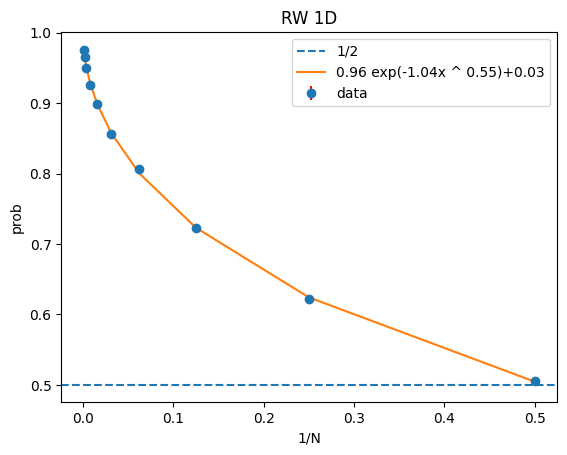

param_0: 0.964996086800155 sd_0: 0.029090360360817
param_1: -1.044898225150162 sd_1: 0.075968989656796
param_2: 0.548226786609373 sd_2: 0.001137526549541
param_3: 0.032347329087265 sd_3: 0.027667402144601
Chi-cuadrado reducido: 1.277181211296006


In [37]:
x = 1/df1["n_max"]
y = df1["prob"]
y_err=df1["error"]

ind = 0
x=x[ind:]
y=y[ind:]
y_err=y_err[ind:]

def model(x,a,b,c,d):
     return a*np.exp(b*x**c)+d

params, covariance = curve_fit(model, x, y)

residuals = (y - model(x, *params))/y_err
chi_squared = np.sum(residuals**2)

# Calcula el número de grados de libertad
num_params = len(params)
num_data_points = len(y)
degrees_of_freedom = num_data_points - num_params

# Calcula el chi-cuadrado reducido
reduced_chi_squared = chi_squared / degrees_of_freedom

# Parámetros ajustados
a, b, c, d = params

ec_str=f"{a:.2f} exp({b:.2f}x ^ {c:.2f})+{d:.2f}"
plt.errorbar(x,y,yerr=y_err,marker="o",ls="",ecolor="red",label="data")

plt.axhline(1/2,ls="--",label="1/2")
plt.plot(x,model(x,*params),label=ec_str)
plt.title("RW 1D")
plt.xlabel("1/N")
plt.ylabel("prob")
plt.legend()
plt.show()

for i in range(len(params)):
     print(f"param_{i}: {params[i]:.15f} sd_{i}: {covariance[i,i]:.15f}")


print(f"Chi-cuadrado reducido: {reduced_chi_squared:.15f}")

$Lim_{x \rightarrow 0} \hspace{0.2cm}0.96 e^{-1.04 x^{0.55}} + 0.03 = 0.99 \approx 1$

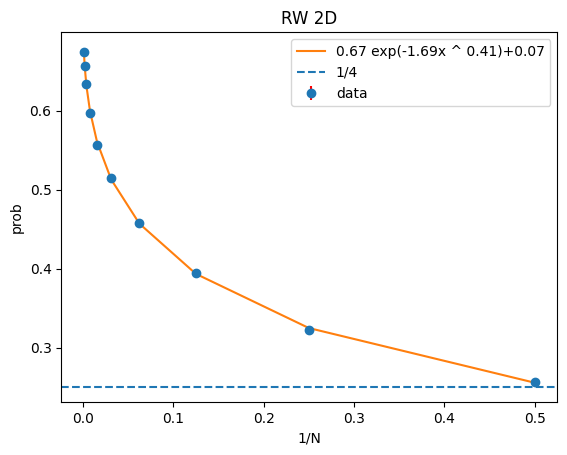

param_0: 0.672313310475144 sd_0: 0.003442737055957
param_1: -1.687555189138223 sd_1: 0.065849897634092
param_2: 0.407325577086869 sd_2: 0.000791280853043
param_3: 0.067294018668429 sd_3: 0.002482273862584
Chi-cuadrado reducido: 0.460995704397403


In [32]:
x = 1/df2["n_max"]
y = df2["prob"]
y_err=df2["error"]

ind = 0
x=x[ind:]
y=y[ind:]
y_err=y_err[ind:]

def model(x,a,b,c,d):
     return a*np.exp(b*x**c)+d

params, covariance = curve_fit(model, x, y)

residuals = (y - model(x, *params))/y_err
chi_squared = np.sum(residuals**2)

# Calcula el número de grados de libertad
num_params = len(params)
num_data_points = len(y)
degrees_of_freedom = num_data_points - num_params

# Calcula el chi-cuadrado reducido
reduced_chi_squared = chi_squared / degrees_of_freedom

# Parámetros ajustados
a, b, c, d = params

ec_str=f"{a:.2f} exp({b:.2f}x ^ {c:.2f})+{d:.2f}"
plt.errorbar(x,y,yerr=y_err,marker="o",ls="",ecolor="red",label="data")
plt.plot(x,model(x,*params),label=ec_str)
plt.axhline(1/4,ls="--",label="1/4")
plt.title("RW 2D")
plt.xlabel("1/N")
plt.ylabel("prob")
#plt.ylim((0.45,1))
plt.legend()
plt.show()

for i in range(len(params)):
     print(f"param_{i}: {params[i]:.15f} sd_{i}: {covariance[i,i]:.15f}")

print(f"Chi-cuadrado reducido: {reduced_chi_squared:.15f}")

$Lim_{x \rightarrow 0} \hspace{0.2cm}0.67 e^{-1.69 x^{0.41}} + 0.07 = 0.74$

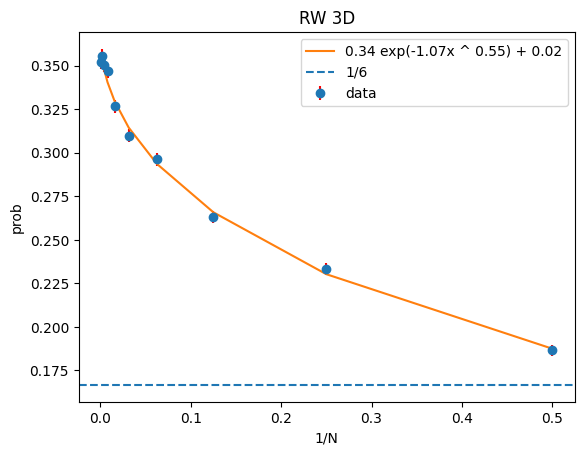

param_0: 0.342655150113557 sd_0: 0.058297990845418
param_1: -1.070403982797737 sd_1: 1.291816346999676
param_2: 0.546097988094014 sd_2: 0.019164158880762
param_3: 0.022857874192132 sd_3: 0.055262302793763
Chi-cuadrado reducido: 1.574831631125496


In [34]:
x = 1/df3["n_max"]
y = df3["prob"]
y_err=df3["error"]

ind = 0
x=x[ind:]
y=y[ind:]
y_err=y_err[ind:]

def model(x,a,b,c,d):
     return a*np.exp(b*x**c)+d

params, covariance = curve_fit(model, x, y)

residuals = (y - model(x, *params))/y_err
chi_squared = np.sum(residuals**2)

# Calcula el número de grados de libertad
num_params = len(params)
num_data_points = len(y)
degrees_of_freedom = num_data_points - num_params

# Calcula el chi-cuadrado reducido
reduced_chi_squared = chi_squared / degrees_of_freedom

# Parámetros ajustados
a, b, c, d = params

ec_str=f"{a:.2f} exp({b:.2f}x ^ {c:.2f}) + {d:.2f}"
plt.errorbar(x,y,yerr=y_err,marker="o",ls="",ecolor="red",label="data")
plt.plot(x,model(x,*params),label=ec_str)
plt.axhline(1/6,ls="--",label="1/6")
plt.title("RW 3D")
plt.xlabel("1/N")
plt.ylabel("prob")
plt.legend()
plt.show()

for i in range(len(params)):
     print(f"param_{i}: {params[i]:.15f} sd_{i}: {covariance[i,i]:.15f}")
     
print(f"Chi-cuadrado reducido: {reduced_chi_squared:.15f}")

$Lim_{x \rightarrow 0} \hspace{0.2cm}0.34 e^{-1.07 x^{0.55}} + 0.02 = 0.36$